In [1]:


#First import all the libraries needed

import numpy as np #for linear algebra
import pandas as pd #for chopping, processing
import csv #for opening csv files
%matplotlib inline 
import matplotlib.pyplot as plt #for plotting the graphs
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.pipeline import Pipeline #to assemble steps for cross validation
from sklearn.preprocessing import PolynomialFeatures #for all the polynomial features
from sklearn import svm #for Support Vector Machines
from sklearn.neighbors import NearestNeighbors #for nearest neighbor classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #for decision tree classifier
from sklearn.naive_bayes import GaussianNB  #for naive bayes classifier
from scipy import stats #for statistical info
from sklearn.model_selection import train_test_split # to split the data in train and test
from sklearn.model_selection import KFold # for cross validation
from sklearn.grid_search import GridSearchCV  # for tuning parameters
from sklearn.neighbors import KNeighborsClassifier  #for k-neighbor classifier
from sklearn import metrics  # for checking the accuracy 
from time import time

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#load data
data = pd.read_csv("data.csv")

In [3]:
#to know the number of cases and the number of variables
data.shape

(569, 32)

In [4]:
#Description of the dataset

#how many cases are included in the dataset
length = len(data)
#how many features are in the dataset
features = data.shape[1]-1

# Number of malignant cases
malignant = len(data[data['diagnosis']=='M'])

#Number of benign cases
benign = len(data[data['diagnosis']=='B'])

#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100

print "There are "+ str(len(data))+" cases in this dataset"
print "There are {}".format(features)+" features in this dataset"
print "There are {}".format(malignant)+" cases diagnosed as malignant tumor"
print "There are {}".format(benign)+" cases diagnosed as benign tumor"
print "The percentage of malignant cases is: {:.4f}%".format(rate)

There are 569 cases in this dataset
There are 31 features in this dataset
There are 212 cases diagnosed as malignant tumor
There are 357 cases diagnosed as benign tumor
The percentage of malignant cases is: 37.2583%


In [5]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
#drop ID because we do not need the ID number as shown above

data.drop('id',axis=1,inplace=True)
#check that dropped
data.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [7]:
# Extract feature columns where everything but the diagnosis is included.
# I am separating all the features that are helpful in determining the diagnosis
features = list(data.columns[1:30])
print features

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [8]:
#Our target is predicting the diagnosis in benign or malignant, so we need
#to extract this one as the dependent variable - the variable we will predict
target = data.columns[0:1]
print target

Index([u'diagnosis'], dtype='object')


In [9]:
#Now we need to separate the data into feature data and target data
X = data[features] #our features that we will use to predict Y
Y = data[target] #our dependent variable, the one we are trying to predict from X

In [10]:
# X should have 29 variables and 569 cases
X.shape

(569, 29)

In [11]:
# Y should have 1 variable - just the diagnosis and 569 cases
Y.shape

(569, 1)

In [12]:
# Show the feature information by printing the first row
# Show the traget information by also printing the first row
print "\nFeature values:"
print X.head(1)
print "\nTarget values:"
print Y.head(1)


Feature values:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0           0.1184   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.2776          0.3001               0.1471         0.2419   

   fractal_dimension_mean       ...        fractal_dimension_se  radius_worst  \
0                 0.07871       ...                    0.006193         25.38   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33            184.6      2019.0            0.1622   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  
0             0.6656           0.7119                0.2654          0.4601  

[1 rows x 29 columns]

Target values:
  diagnosis
0         M


In [13]:
df=pd.DataFrame(data)

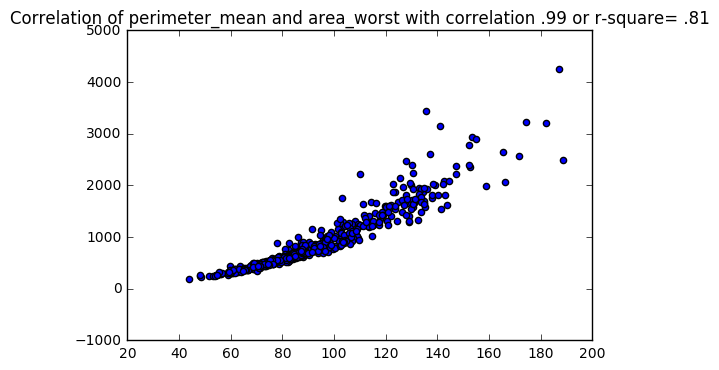

In [14]:
#Research shows that any variables that are highly correlated
#should be removed from further analysis. But, PCA takes care of multicollinearity, so maybe 
#I identify them which ones there are and let PCA to do its job.  
#Just in case let's see how two highly correlated variables look like
#using prettyplots
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
for i in range(1):
    x=df['perimeter_mean']
    y=df['area_worst']
    ax.scatter(x,y, label=str(i))
#ax.legend()
ax.set_title('Correlation of perimeter_mean and area_worst with correlation .99 or r-square= .81')
fig.savefig('scatter.png')

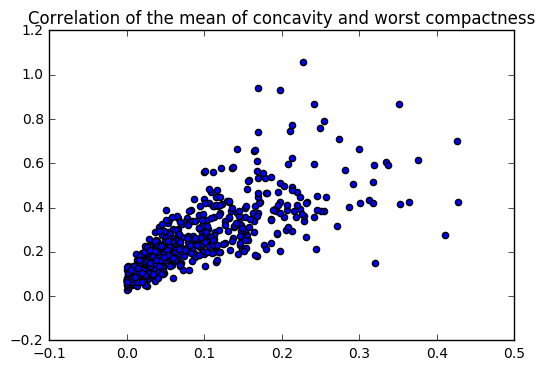

In [15]:
#Let's visualize another set of variables that are not correlated as highly as the first ones
#These have a correlation coefficient of .75 which means an r-squared score of approximately .49
fig, ax = plt.subplots(1)
for i in range(1):
    x=df['concavity_mean']
    y=df['compactness_worst']
    ax.scatter(x,y, label=str(i))
#ax.legend()
ax.set_title('Correlation of the mean of concavity and worst compactness')
fig.savefig('scatter.png')

In [16]:
def preprocess_features(X):
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all M/B malignant/benign values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['M', 'B'], [1, 0])
 
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X = preprocess_features(X)
Y = preprocess_features(Y)
print "Processed feature columns ({} total features):\n{}".format(len(X.columns), list(X.columns))
print "Target columns ({} total features):\n{}".format(len(Y.columns), list(Y.columns))

Processed feature columns (29 total features):
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']
Target columns (1 total features):
['diagnosis']


In [27]:
# import cross_validation to split the train and testing
from sklearn.cross_validation import train_test_split
# Set the number of training points
nr_train = 300
# Set the number of testing points
nr_test = X.shape[0] - nr_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=nr_test, random_state=40)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 400 samples.
Testing set has 169 samples.


In [28]:
from sklearn.metrics import f1_score
def train_classifier(clf, X_train, Y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, Y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    Y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, Y_pred, pos_label=1)


def train_predict(clf, X_train, Y_train, X_test, Y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, Y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, Y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, Y_test))

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


In [30]:
clf_A = KNeighborsClassifier()
clf_B = DecisionTreeClassifier(random_state=0)
clf_C = SVC()
clf_D = GaussianNB()
clf_E = RandomForestClassifier(n_estimators=10)
clf_G = AdaBoostClassifier()
clf_H = QuadraticDiscriminantAnalysis()
clf_I = MLPClassifier(alpha=1)


In [31]:
X_train_100 = X_train[:100]
Y_train_100 = Y_train[:100]

X_train_200 = X_train[:200]
Y_train_200 = Y_train[:200]

X_train_300 = X_train[:300]
Y_train_300 = Y_train[:300]

X_train_300 = X_train[:400]
Y_train_300 = Y_train[:400]


In [34]:
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_G, clf_H, clf_I]:
    for size in [300, 400]:
        train_predict(clf, X_train[:size], Y_train[:size], X_test, Y_test)
        print '/n'

Training a KNeighborsClassifier using a training set size of 300. . .
Trained model in 0.0012 seconds
Made predictions in 0.0029 seconds.
F1 score for training set: 0.9156.
Made predictions in 0.0017 seconds.
F1 score for test set: 0.8738.
/n
Training a KNeighborsClassifier using a training set size of 400. . .
Trained model in 0.0006 seconds
Made predictions in 0.0029 seconds.
F1 score for training set: 0.9290.
Made predictions in 0.0019 seconds.
F1 score for test set: 0.9038.
/n
Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0030 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.8654.
/n
Training a DecisionTreeClassifier using a training set size of 400. . .
Trained model in 0.0049 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0001 seconds.
F1 score for test set: 0.9074.
/n
Training a SVC using a t

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Trained model in 0.1778 seconds
Made predictions in 0.0075 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0055 seconds.
F1 score for test set: 0.9533.
/n
Training a AdaBoostClassifier using a training set size of 400. . .
Trained model in 0.1767 seconds
Made predictions in 0.0057 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0044 seconds.
F1 score for test set: 0.9541.
/n
Training a QuadraticDiscriminantAnalysis using a training set size of 300. . .
Trained model in 0.0021 seconds
Made predictions in 0.0006 seconds.
F1 score for training set: 0.9694.
Made predictions in 0.0004 seconds.
F1 score for test set: 0.9369.
/n
Training a QuadraticDiscriminantAnalysis using a training set size of 400. . .
Trained model in 0.0013 seconds
Made predictions in 0.0005 seconds.
F1 score for training set: 0.9585.
Made predictions in 0.0004 seconds.
F1 score for test set: 0.9381.
/n
Training a MLPClassifier using a training set size of 300. . .
Trained model in 0.

In [80]:
clf_D = GaussianNB()
clf_G = AdaBoostClassifier(algorithm = 'SAMME')
clf_H = QuadraticDiscriminantAnalysis(reg_param = 0.001, store_covariances=True, tol = 0.01)

In [81]:
X_train_300 = X_train[:300]
Y_train_300 = Y_train[:300]

X_train_300 = X_train[:400]
Y_train_300 = Y_train[:400]

In [82]:
for clf in [clf_D, clf_G, clf_H]:
    for size in [300, 400]:
        train_predict(clf, X_train[:size], Y_train[:size], X_test, Y_test)
        print '/n'

Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0015 seconds
Made predictions in 0.0004 seconds.
F1 score for training set: 0.9182.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.9444.
/n
Training a GaussianNB using a training set size of 400. . .
Trained model in 0.0010 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.9164.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.9541.
/n
Training a AdaBoostClassifier using a training set size of 300. . .
Trained model in 0.1797 seconds
Made predictions in 0.0031 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0027 seconds.
F1 score for test set: 0.9720.
/n
Training a AdaBoostClassifier using a training set size of 400. . .
Trained model in 0.1851 seconds
Made predictions in 0.0035 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0026 seconds.
F1 score for test set: 0.9369.
/n
Training a QuadraticDiscriminantAnalysis using a tra

In [86]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [87]:
Y_test.shape

(169, 1)

In [89]:
from sklearn.datasets import make_classification

In [92]:
from sklearn import metrics
import pandas as pd
from ggplot import *

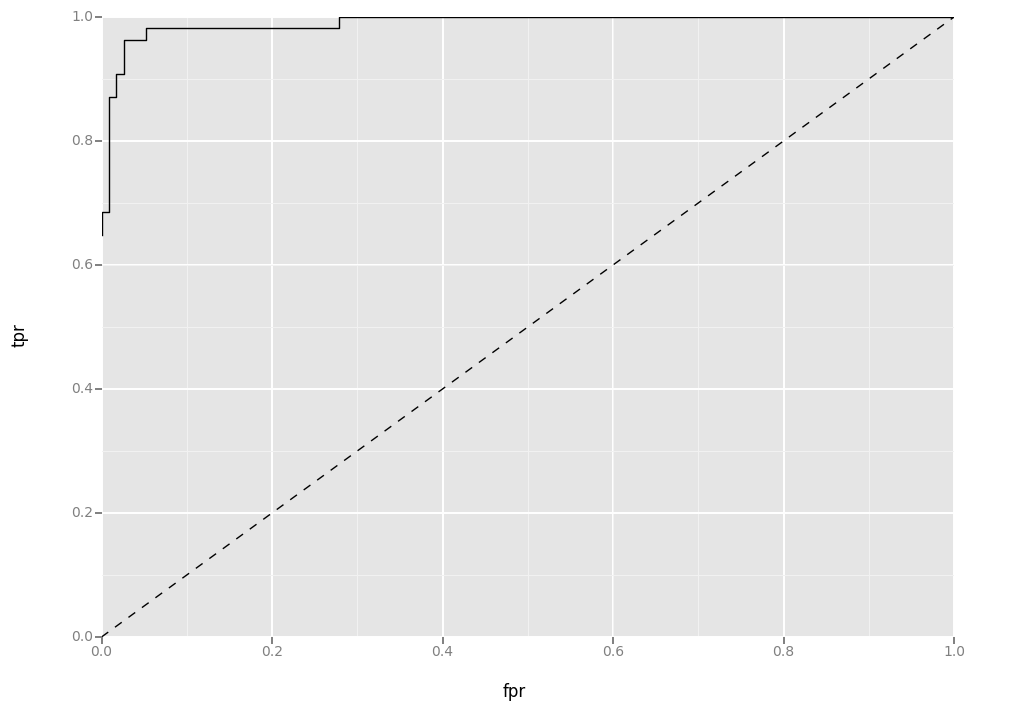

<ggplot: (301128421)>

In [121]:
# ROC curve for Naive Bayes
preds = clf_D.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

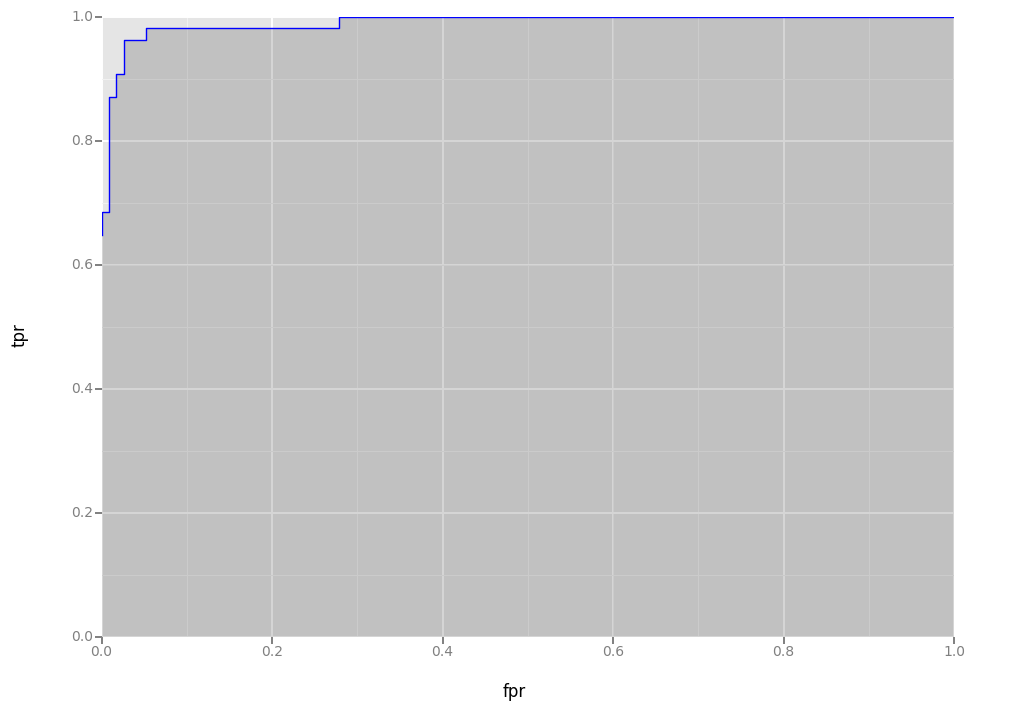

<ggplot: (301165321)>

In [122]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', y='tpr')) + geom_area(alpha=0.2) + geom_line(aes(y='tpr', color = 'blue'))


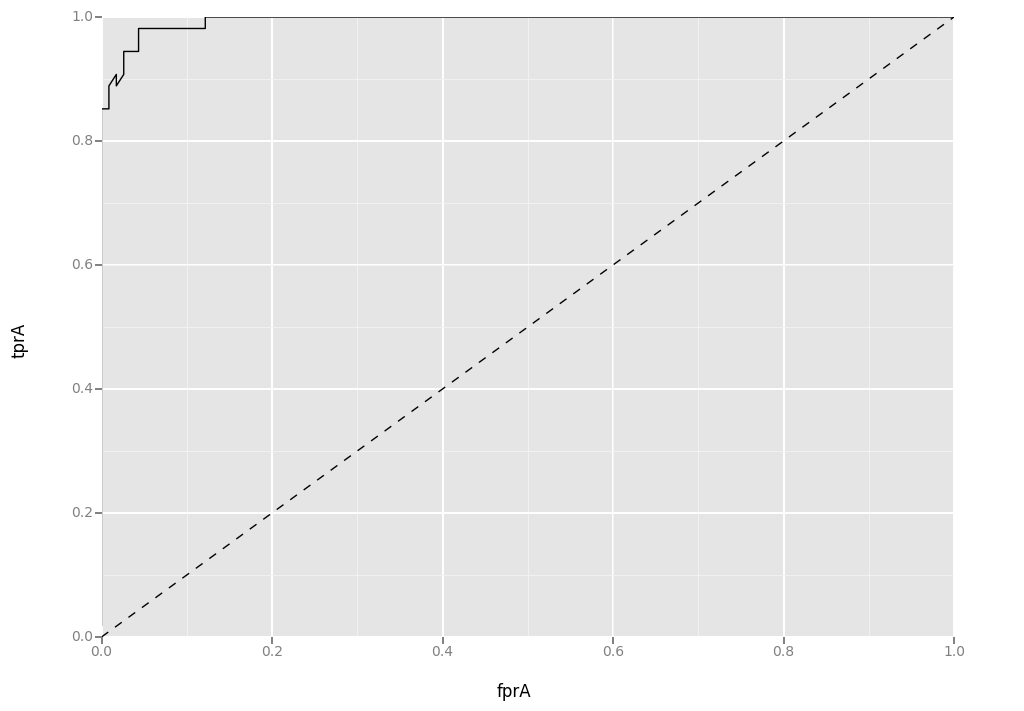

<ggplot: (301165393)>

In [123]:
# ROC curve for AdaBoost
preds = clf_G.predict_proba(X_test)[:,1]
fprA, tprA, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprA=fprA, tprA=tprA))
ggplot(df, aes(x='fprA', y='tprA')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

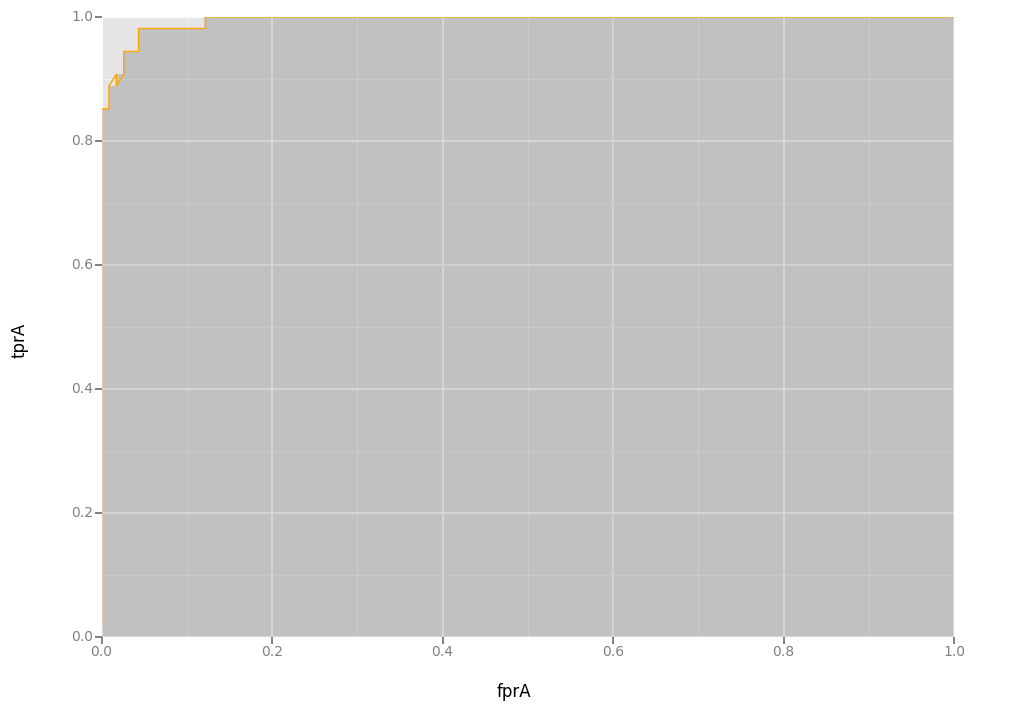

<ggplot: (301939085)>

In [124]:
auc = metrics.auc(fprA,tprA)
ggplot(df, aes(x='fprA', y='tprA')) + geom_area(alpha=0.2) + geom_line(aes(y='tprA', colour = 'orange'))


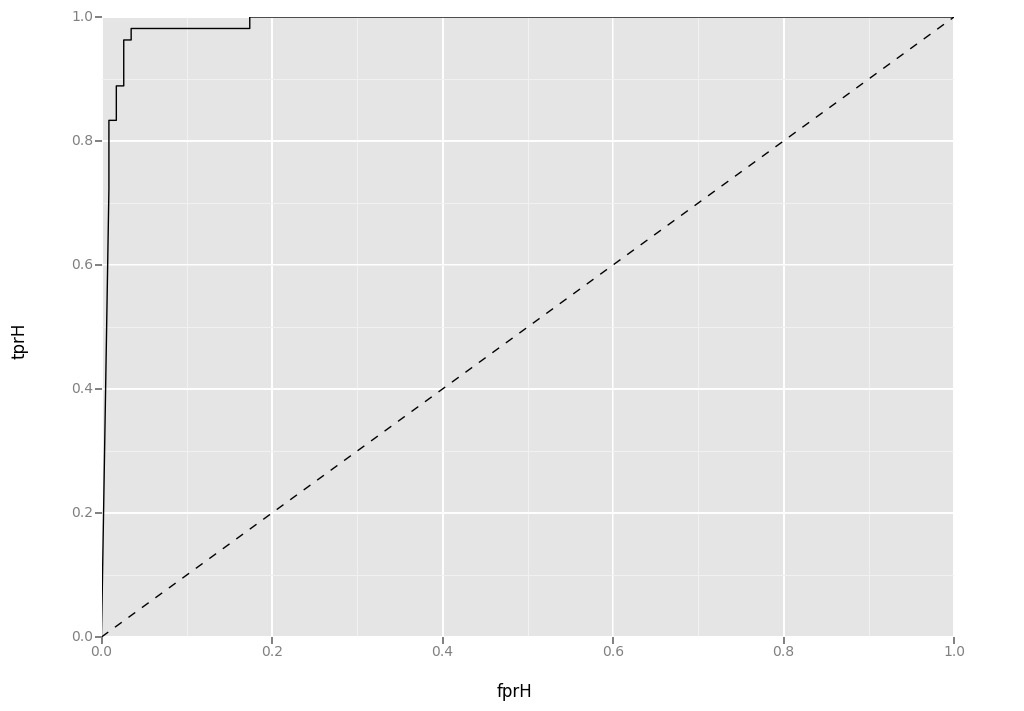

<ggplot: (301167937)>

In [125]:
# ROC curve for QDA
preds = clf_H.predict_proba(X_test)[:,1]
fprH, tprH, _ = metrics.roc_curve(Y_test, preds)

df = pd.DataFrame(dict(fprH=fprH, tprH=tprH))
ggplot(df, aes(x='fprH', y='tprH')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

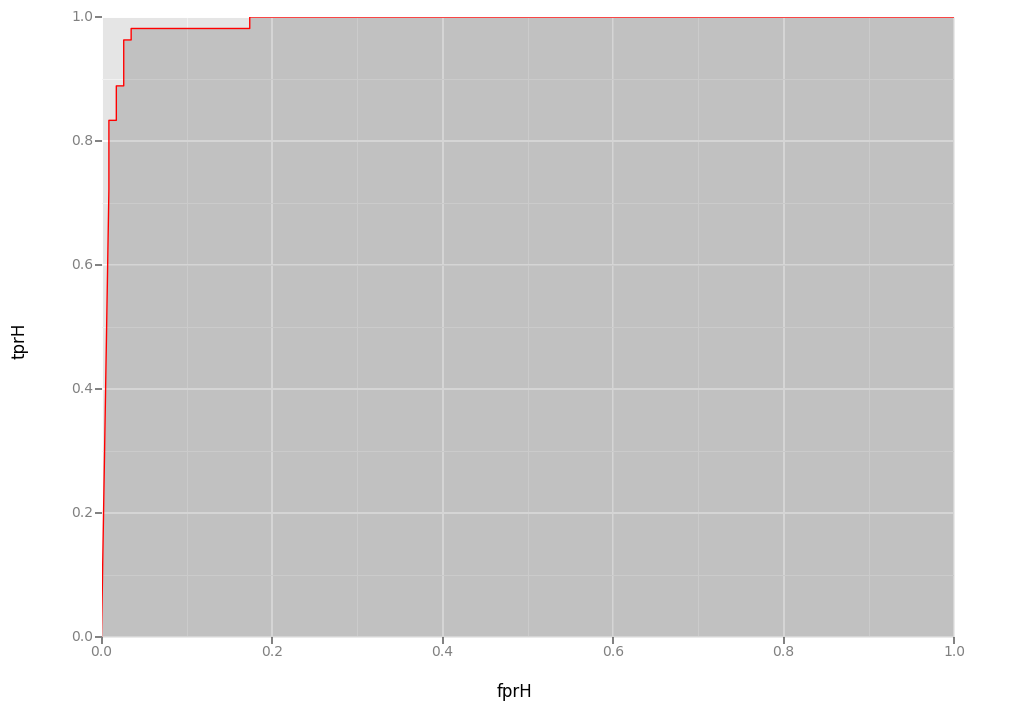

<ggplot: (304400941)>

In [132]:
auc = metrics.auc(fprH,tprH)
ggplot(df, aes(x='fprH', y='tprH')) + geom_area(alpha=0.2) + geom_line(aes(y='tprH', color = 'red'))
